# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [4]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

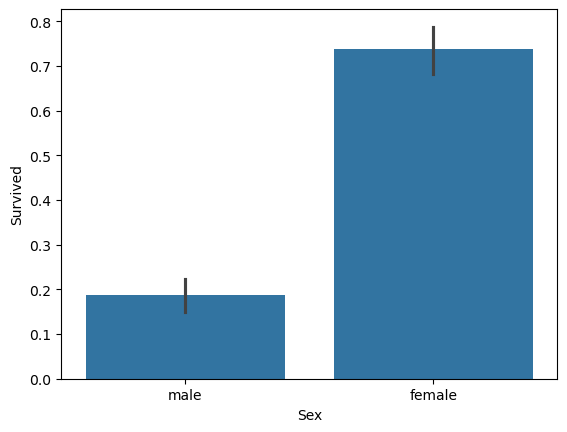

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes. First class passengers had a higher survival rate than both second- and third-class passengers. 

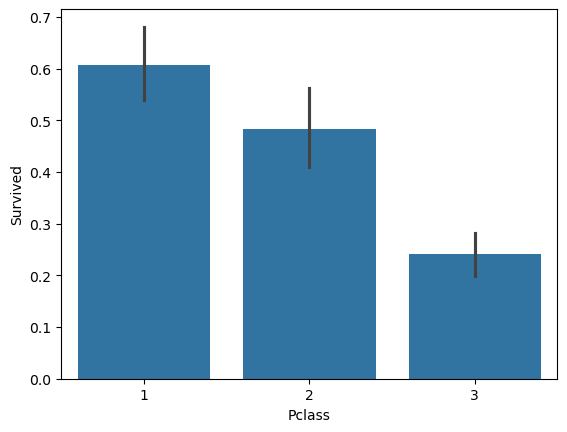

In [8]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes. We can see that passengers that embarked at Cherbourg have a survival rate of 0.544, while Southampton and Queenstown have survival rates of 0.335 and 0.367 respectively. 

Embarked
C    0.544000
Q    0.366667
S    0.335238
Name: Survived, dtype: float64


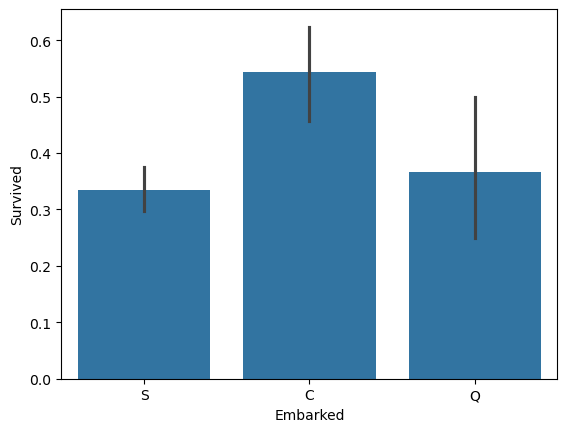

In [14]:
# Show the relevant statistics or visualization(s) to support your answer
# Question 2: Is survival related to Embarked?
sns.barplot(x='Embarked', y='Survived', data=data)
print(data.groupby('Embarked').Survived.mean())

# Question 3: How is age related to survival?

Answer: Children (age 0-12) have the highest survival rate (0.569). Teens, young adults, adults, and middle aged people (12-65) have roughly the same survival rate, ranging from 0.377-0.391. Elderly people have a low survival rate: 0.2. 

AgeClass
child          0.569
teen           0.377
young_adult    0.346
adult          0.393
middle_aged    0.391
elderly        0.200
Name: Survived, dtype: float64


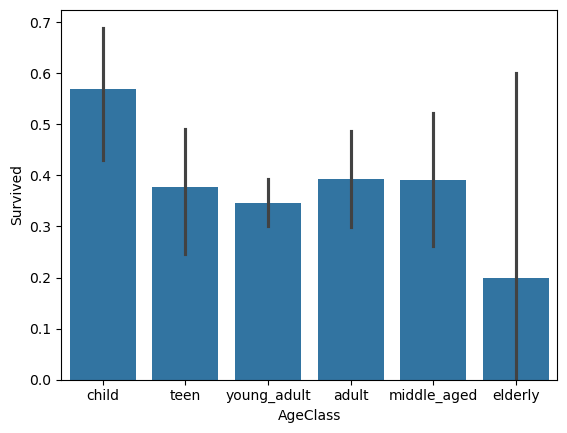

In [36]:
# Show the relevant statistics or visualization(s) to support your answer
# Question 3: Is survival related to Age?
data['AgeClass'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 50, 65, 100], labels=['child', 'teen', 'young_adult', 'adult', 'middle_aged', 'elderly'])
sns.barplot(x='AgeClass', y='Survived', data=data)
print(data.groupby('AgeClass', observed=True).Survived.mean().round(3))

# Question 4: Does family size somehow affect the survival rate?

Answer: Yes. Passengers with 1 or 2 siblings/spouses aboard have a higher chance of survival compared to those with 0, 3, 4, 5, or 8 siblings/spouses:
SibSp|Survival rate
0    0.345
1    0.506
2    0.478
3    0.308
4    0.188

FamilySize
0     0.305361
1     0.519685
2     0.556962
3     0.730769
4     0.181818
5     0.176471
6     0.300000
7     0.000000
10    0.000000
Name: Survived, dtype: float64


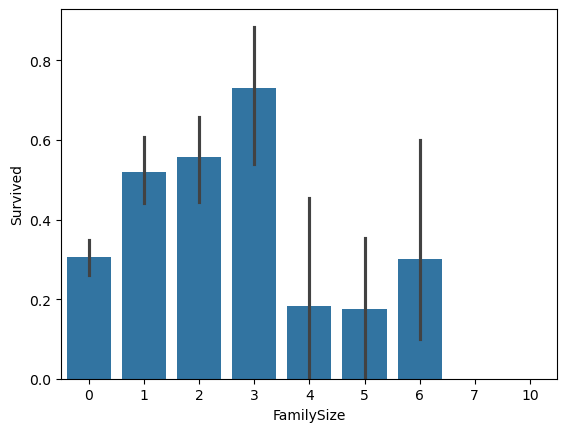

In [41]:
# Show the relevant statistics or visualization(s) to support your answer
# Question 4: Is survival related to parch or sibsp?
data['FamilySize'] = data['Parch'] + data['SibSp']
sns.barplot(x='FamilySize', y='Survived', data=data)
print(data.groupby('FamilySize').Survived.mean())

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Give your answer here.

<Axes: xlabel='Parch', ylabel='Survived'>

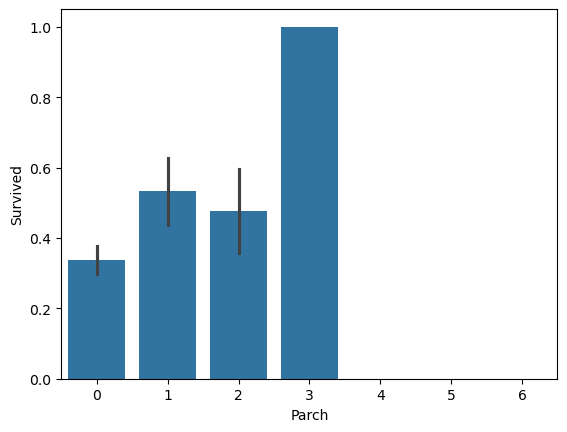

In [40]:
# Show the relevant statistics or visualization(s) to support your answer
# Question 5: Is survival related to Parch?
sns.barplot(x='Parch', y='Survived', data=data)